In [4]:
import pandas as pd
import numpy as np
from sklearn import ensemble
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import missingno as msno
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
from time import time
from time import sleep
import glob

from sklearn.ensemble import 

In [83]:
all_data = pd.read_csv('all_data.csv')

In [84]:
all_data = pd.read_excel('SCUT-FBP5500_v2/All_Ratings.xlsx')

In [85]:
all_data.describe()

,Rater,Rating,original Rating
count,330000.000000,330000.000000,38500.000000
mean,30.500000,2.990891,2.921065
std,17.318129,0.942182,0.939854
min,1.000000,1.000000,1.000000
25%,15.750000,2.000000,2.000000
50%,30.500000,3.000000,3.000000
75%,45.250000,4.000000,3.000000
max,60.000000,5.000000,5.000000


In [86]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330000 entries, 0 to 329999
Data columns (total 4 columns):
Rater              330000 non-null int64
Filename           330000 non-null object
Rating             330000 non-null int64
original Rating    38500 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 10.1+ MB


In [87]:
print('Number of pictures:',len(all_data['Filename'].unique()))
print('Number of raters:',len(all_data['Rater'].unique()))

Number of pictures: 5500
Number of raters: 60


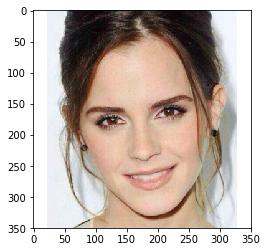

In [88]:
img = mpimg.imread('SCUT-FBP5500_v2/Images/CF640.jpg')
img.shape
plt.imshow(img)

In [89]:
cwd = os.getcwd()
cwd = cwd + str('/SCUT-FBP5500_v2/Images/')
files = os.listdir(cwd)
print(files[:5])

['CF121.jpg', 'AF1607.jpg', 'AF1161.jpg', 'CM712.jpg', 'AF597.jpg']


In [90]:
img_pixels = np.zeros((5500,350*350))
for i in range(len(files)):
    img = mpimg.imread(cwd + files[i]).reshape((350*350,3))
    val = np.sum(img,axis=1)/3
    img_pixels[i,:] = val

In [91]:
img_pixels[0,:5]

array([255., 255., 255., 255., 255.])

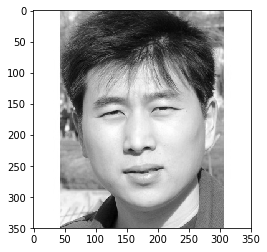

In [92]:
plt.imshow(img_pixels[1096,:].reshape((350,350)),cmap='gray')

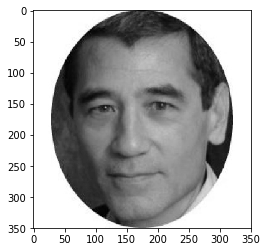

In [93]:
plt.imshow(img_pixels[1082,:].reshape((350,350)),cmap='gray')

In [94]:
cols = str('pix'+str(np.arange(len(img_pixels[0,:]))+1))

In [98]:
cols = []
vals = np.arange(len(img_pixels[0,:]))+1
for i in range(len(img_pixels[0,:])):
    cols.append('pix'+str(vals[i]))
print(cols[:5])

['pix1', 'pix2', 'pix3', 'pix4', 'pix5']


In [99]:
img_data = pd.DataFrame(img_pixels,columns=cols)

# PCA Analysis

In [100]:
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA

In [77]:
X, y = make_regression(n_features=100, n_samples=1000, effective_rank=20)

In [101]:
val1 = img_data
new_img = np.asarray(val1)
new_img.shape

(5500, 122500)

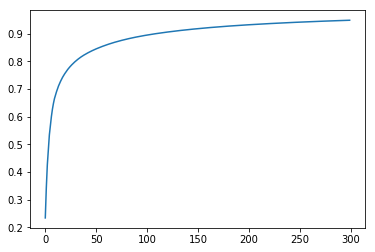

In [102]:
pca = PCA(n_components=300)
X_5dim = pca.fit_transform(new_img)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)

In [103]:
pca.explained_variance_ratio_[:10]

array([0.23455847, 0.10857376, 0.0833189 , 0.05619536, 0.05192904,
       0.03478668, 0.03151575, 0.02629109, 0.02088348, 0.01730781])

In [19]:
X_5dim[:50,:50]

array([[ -5224.34700134,   7965.22213138,   2780.58139935, ...,
          1125.2651271 ,   1512.22196444,    706.51252122],
       [   110.47888789,  -6738.97648146,  -1939.31966083, ...,
           190.34250271,   -272.37518402,   -455.49413691],
       [ 12354.88233437,   7374.71869557,  -5944.03281798, ...,
         -3592.58771908,  -1801.01901933,  -1039.48362692],
       ...,
       [ 11844.43600507,  -1187.14691552,   3065.70363402, ...,
           -39.56372122,    375.92906731,   -676.33907151],
       [ -9589.91306221,   7284.61791156,  13438.19317612, ...,
           479.78660755,    546.37468023,   -908.5036503 ],
       [-12316.16538767,    461.3960077 ,  11302.73840865, ...,
           918.43607276,     39.83036757,     61.65827173]])

In [104]:
cols = []
vals = np.arange(len(X_5dim[0,:]))+1
for i in range(len(X_5dim[0,:])):
    cols.append('col'+str(vals[i]))
print(cols[:5])

['col1', 'col2', 'col3', 'col4', 'col5']


In [105]:
final_data = pd.DataFrame(X_5dim,columns=cols)

In [145]:
## Resize arbitrary images 
from PIL import Image
from resizeimage import resizeimage

def get_pixels():
    cwd = os.getcwd()
    cwd = cwd + str('/Selfies')
    files = list(os.listdir(cwd))
    files.remove('.DS_Store')
    
    img_pixels = np.zeros((len(files),350*350))
    for i in range(len(files)):
        img = Image.open('Selfies/'+files[i])
        cover = resizeimage.resize_cover(img, [350, 350])
        cover = np.sum(cover,axis=2)/3
        img_pixels[i,:] = cover.reshape((350*350))
    return img_pixels 

In [143]:
cwd = os.getcwd()
cwd = cwd + str('/Selfies')
files = list(os.listdir(cwd))

In [149]:
len(files)
files.remove('.DS_Store')

In [150]:
new_data = pca.transform(images)
new_data = pd.DataFrame(new_data,columns=cols)
new_data.loc[:,'Image'] = files

In [151]:
new_data.to_csv('ind_pics.csv')

In [106]:
final_data.loc[:,'Image'] = files
final_data

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col292,col293,col294,col295,col296,col297,col298,col299,col300,Image
0,-5224.347001,7965.222131,2780.581399,-4805.344560,-922.945372,-5478.321872,-9266.886033,-3805.557059,-1560.963801,11910.357964,...,-47.533330,272.454769,-474.794079,-79.181110,175.179950,86.787181,207.614481,-249.308931,-383.874390,CF121.jpg
1,110.478888,-6738.976481,-1939.319661,3303.530496,-7448.421000,-1704.909371,-404.544995,4325.742439,-2473.687277,420.629576,...,56.497162,-12.351663,-243.364278,-205.004561,112.058543,-27.224178,5.939480,242.666661,87.494247,AF1607.jpg
2,12354.882334,7374.718696,-5944.032818,3684.033191,-464.386074,-3074.435831,3828.398283,5218.235319,-2560.894578,-1575.753745,...,176.937190,-359.458971,25.917301,514.267156,-146.557071,-501.928316,-380.124412,49.652555,162.172772,AF1161.jpg
3,6143.085336,392.093273,-4158.684221,1301.246061,6246.261815,-5916.000381,-819.346818,-125.463038,712.599329,-1375.318376,...,162.514673,-625.320056,311.648694,47.396594,-271.080069,24.905043,283.832272,-117.436568,466.841702,CM712.jpg
4,9434.506584,-5656.905694,5590.035144,5110.524016,-6125.834124,3964.563456,948.131693,821.912562,-266.663054,3731.119378,...,-192.038722,-45.234465,-358.951685,-334.465297,267.027737,-69.591423,150.865849,45.864491,13.731079,AF597.jpg
5,-6691.449474,2832.834145,-5015.112640,3632.686074,-5854.174679,3754.525493,4167.393252,5820.377406,2126.994961,620.083581,...,329.794643,-104.239558,-9.143425,-318.833929,-355.016116,-282.133404,412.194283,224.119442,121.857130,CF647.jpg
6,13846.845188,-2050.104775,2526.954319,1154.263822,5972.266137,-1798.817105,262.451451,-2925.425306,3852.850444,-1677.676646,...,-0.364985,87.864690,19.434876,224.008587,10.132937,173.479403,3.073450,-135.827692,-64.157854,AF583.jpg
7,-13417.400726,1029.792526,-4466.082522,979.872152,3892.533209,5069.354571,4003.960365,3318.121511,4084.770212,-2872.477697,...,-141.064167,316.362964,187.438182,92.330878,-41.093671,-16.236918,404.295159,133.790567,370.412027,CF653.jpg
8,13525.713370,-1281.417873,468.948253,931.167888,-3919.998431,-2584.386474,6496.908473,-1901.499620,5119.587408,3094.511429,...,-83.809641,72.929043,-66.516181,136.095749,-355.227773,18.322193,-267.779276,-458.443917,-450.560025,AF1175.jpg
9,11519.201025,-1893.370022,2236.965891,-3989.474503,-503.182513,6721.210359,-3974.823234,-2383.548950,2735.989965,-3189.659915,...,134.557389,-255.834999,-185.098839,-12.346711,125.987491,-19.002293,-308.409950,84.629060,-44.939218,CM706.jpg


In [26]:
#final_data.to_csv('final_data.csv')
means = pd.read_csv('means.csv')

In [140]:
files.remove('.DS_Store')

In [146]:
images = get_pixels()

0


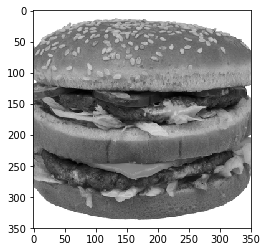

1


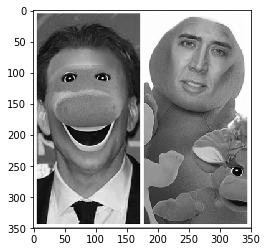

2


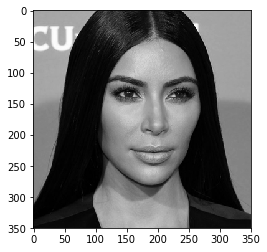

3


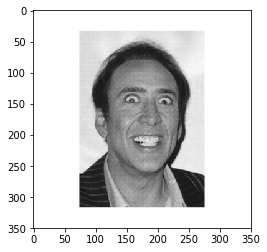

4


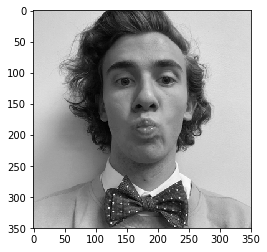

5


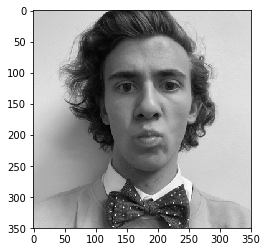

6


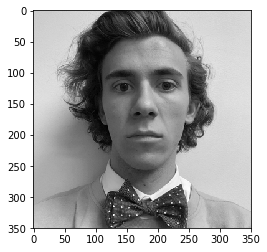

7


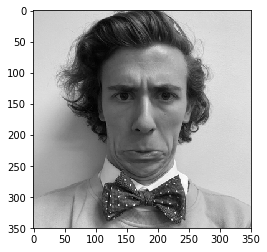

8


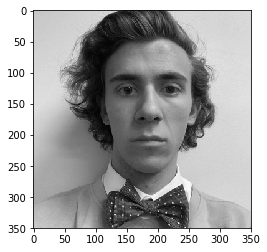

9


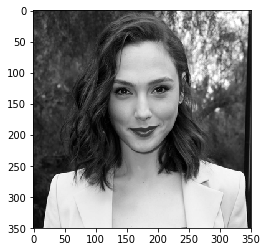

10


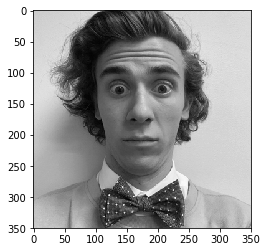

11


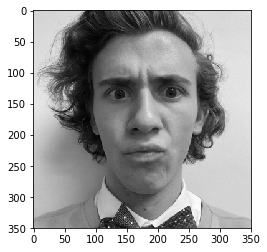

12


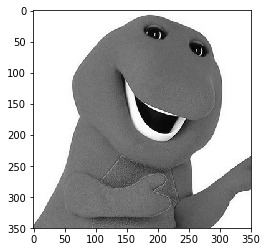

13


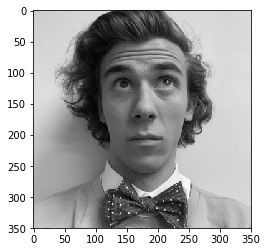

14


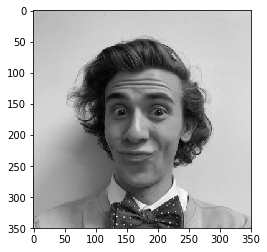

15


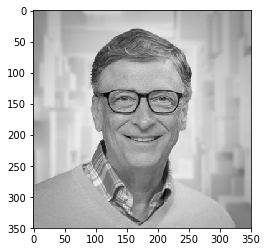

16


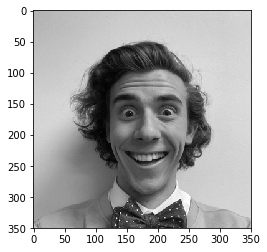

17


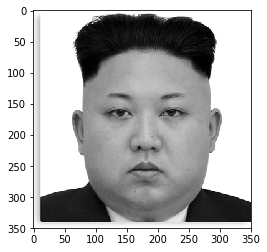

In [152]:
for i in range(len(images[:,0])):
    print(i)
    plt.imshow(images[i,:].reshape((350,350)),cmap='gray')
    plt.show()

In [76]:
with open('Selfies/'+files[0], 'r+b') as f:
    with Image.open(f) as image:
        print(type(image))
        cover = resizeimage.resize_cover(image, [200, 100])
        cover.save('test-image-cover.jpeg', image.format)

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [77]:
cwd = os.getcwd()
cwd = cwd + str('/Selfies')
files = list(os.listdir(cwd))

#img = mpimg.imread('Selfies/'+files[5])
# for i in range(len(files)):
#     img = mpimg.imread('Selfies/'+files[i])
#     plt.imshow(img)
#     plt.show()
#plt.imshow(img)


img = Image.open('Selfies/'+files[1])
cover = resizeimage.resize_cover(img, [350, 350])
cover = np.sum(cover,axis=2)/3
img_pixels[1,:] = cover.reshape((350*350))

In [ ]:
plt.imshow(img_pixels[0,:])

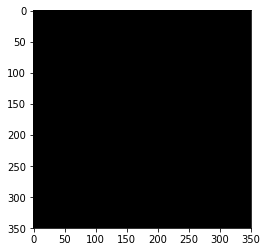

In [46]:
for i in range(len(files1)):
    plt.imshow(files1[i,:].reshape((350,350)),cmap='gray')